# Interview Question #

(Q) : Why batch_size is provided in multipy by 2. (ex. 2,4,6,8,10,...256.. etc)

(A) : To utilize RAM effectively. Because Ram is designed to handle binary values. so, execution time of code can be improved if we do this.

In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
df =  pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.duplicated().sum()

0

In [5]:
# Removing unnecessary columns
df = df.drop(columns=['User ID','Gender'])
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

# Splitting the dataset #

In [7]:
from sklearn.model_selection import train_test_split

# 'random_state' Controls the shuffling applied to the data before applying the split.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

# Scalling #
Here, we dont know highest and lower value. so, we need to perform StandarScaler

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
x_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

# NN modeling #

In [10]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model  = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # activation = 'sigmoid' : Binary classification

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

# (Vannila) Batch Gradient Descent #

model.fit(x_train_scaled,y_train,epochs=10,batch_size=320)

(1) Here, if we are keeping batch-size = 320 that means we are implementing Vannila Gradient Decent. It describes we are making 1 batch of 320 points which are equivalent to the number of rows of dataset. 

(2) no_updates_for_weights_Bias = no of epochs

(3) It will consider entire dataset to update weights and bias. Also, weights and bias will be updated only once in one cycle of epochs




In [13]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Batch GD
model_logs_batch = model.fit(x_train_scaled,y_train,epochs=250,batch_size=320)


Epoch 1/250


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.6531 - loss: 0.6883
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6562 - loss: 0.6813
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6531 - loss: 0.6764
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6531 - loss: 0.6722
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6562 - loss: 0.6685
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6594 - loss: 0.6651
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6625 - loss: 0.6619
Epoch 8/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6656 - loss: 0.6589
Epoch 9/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6687 - loss: 0.6561
Epoch 10/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6719 - loss: 0.6533
Epoch 11/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6750 - loss: 0.6506
Epoch 12/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6719 - loss: 0.6481


# Stochastic Gradient Descent #

model.fit(x_train_scaled,y_train,epochs=10,batch_size=1)

(1) Here, if we are keeping batch-size = 1 that means we are implementing Stochastic Gradient Decent. It describes we are making 320 batch of 320 points which means we will consider each data point as one batch

(2) no_updates_for_weights_Bias = no of epochs * number of rows of dataset.

(3) It will consider randomly one datapoint from dataset to update weights and bias. Also, weights and bias will be updated for each data points (num_rows).



In [14]:
# Stochastic GD
model_logs_stochastic = model.fit(x_train_scaled,y_train,epochs=250,batch_size=1)


Epoch 1/250


320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.8947 - loss: 0.2778
Epoch 2/250
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.8821 - loss: 0.2510
Epoch 3/250
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.9025 - loss: 0.2514
Epoch 4/250
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.9053 - loss: 0.2595
Epoch 5/250
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.8986 - loss: 0.2624
Epoch 6/250
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.8944 - loss: 0.2777
Epoch 7/250
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.8914 - loss: 0.2949
Epoch 8/250
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.9022 - loss: 0.2435
Epoch 9/250
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.9293 - loss: 0.2110
Epoch 10/250
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.9097 - loss: 0.2435
Epoch 11/250
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.9156 - loss: 0.2443
Epoch 12/250
320/320 ━━━━━━━━━━

# (Vannila) Batch Gradient Descent v/s Stochastic Gradient Descent #

(Vannila) Batch Gradient Decent is faster than Stochastic Gradient Decent.

but, Stochastic Gradient Decent will give correct weights and bias faster than (Vannila) Batch Gradient Decent. Because, it will perform more updates of weights and bias.

In [15]:
y_pred = model.predict(x_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


#  Vannila v/s Stochatic GD loss function fluctuations #
Because Stochatic will choose 1 data point randomly. it will vary while calculating loss, 

while, batch GD always consider entire datset to update weights and bias, so we will get smooth line of loss function.

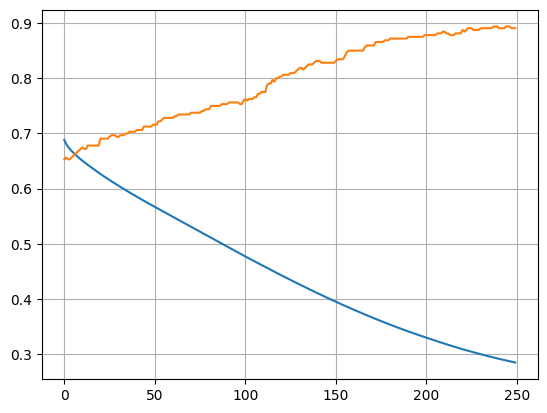

In [16]:
import matplotlib.pyplot as plt
plt.plot(model_logs_batch.history['loss'])
plt.plot(model_logs_batch.history['accuracy'])
plt.grid()

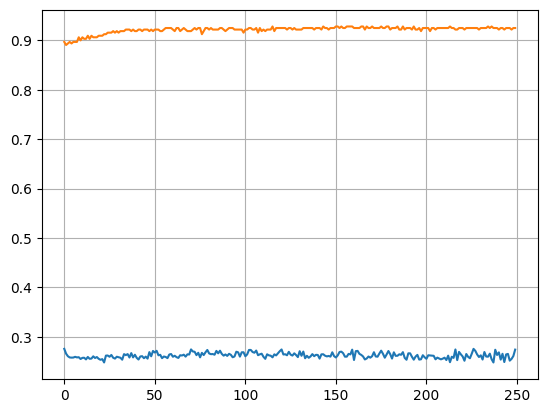

In [17]:
import matplotlib.pyplot as plt
plt.plot(model_logs_stochastic.history['loss'])
plt.plot(model_logs_stochastic.history['accuracy'])
plt.grid()

# Mini-batch Gradient Descent #

Middle way of Batch GD & Stochacstic GD

model.fit(x_train_scaled,y_train,epochs=10,batch_size=50)

(1) Here, you can select any number of batch_size.

So, num_batch = total_data / given batch_size

(2) no_batch = no_update in weight and bias for 1 epoch